In [ ]:
#to add kaggle.json file
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rishithavurimi","key":"4ecee87b3242d405e9821bef309976b2"}'}

In [ ]:
#creating kaggle dir and moving kaggle.json to kaggle dir
!mkdir -p ~/.kaggle

!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d shadabhussain/flickr8k

flickr8k.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#extracting the zipfile
from zipfile import ZipFile
file_name = 'flickr8k.zip'

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("Done")   

Done


In [ ]:
#paths for required files
images_path = '/content/flickr_data/Flickr_Data/Images'
captions_path = '/content/flickr_data/Flickr_Data/Flickr_TextData/Flickr8k.token.txt'
train_path = '/content/flickr_data/Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt'
test_path = '/content/flickr_data/Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt'
val_path = '/content/flickr_data/Flickr_Data/Flickr_TextData/Flickr_8k.devImages.txt'

#converting the file text in to array
captions = open(captions_path, 'r').read().split("\n")
x_train = open(train_path, 'r').read().split("\n")
x_test = open(test_path, 'r').read().split("\n")
x_val = open(val_path, 'r').read().split("\n")

In [ ]:
#creating key value pair where key is imagefileName and value is its captions(4-5)
imgCaptionsPair = {}
tokens = imgCaptionsPair

for ix in range(len(captions) - 1):
  temp = captions[ix].split("#")
  if temp[0] in imgCaptionsPair:
    imgCaptionsPair[temp[0]].append(temp[1][2:])
  else:
    imgCaptionsPair[temp[0]] = [temp[1][2:]]


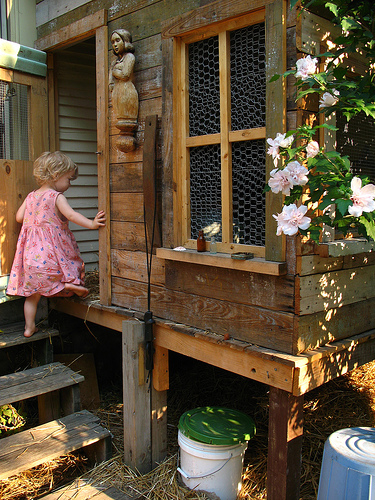

A child in a pink dress is climbing up a set of stairs in an entry way .
A girl going into a wooden building .
A little girl climbing into a wooden playhouse .
A little girl climbing the stairs to her playhouse .
A little girl in a pink dress going into a wooden cabin .


In [ ]:
#to display captions of an image in particular
from IPython.display import Image, display

temp = captions[1].split("#")
z = Image(filename = images_path+"/"+temp[0])
display(z)

for ix in range(len(imgCaptionsPair[temp[0]])):
    print(imgCaptionsPair[temp[0]][ix])

In [ ]:
#for any importings!


In [ ]:
#creating different files for test train and test captions
train_dataset = open('flickr_8k_train_dataset.txt','wb')
train_dataset.write(b"image_id\tcaptions\n")

val_dataset = open('flickr_8k_val_dataset.txt','wb')
val_dataset.write(b"image_id\tcaptions\n")

test_dataset = open('flickr_8k_test_dataset.txt','wb')
test_dataset.write(b"image_id\tcaptions\n")


18

In [ ]:
# Populating the above created files for train, test and validation dataset with image ids and captions for each of these images
for img in x_train:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        train_dataset.write((img+"\t"+caption+"\n").encode())
        train_dataset.flush()
train_dataset.close()



In [ ]:
for img in x_test:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        test_dataset.write((img+"\t"+caption+"\n").encode())
        test_dataset.flush()
test_dataset.close()

for img in x_val:
    if img == '':
        continue
    for capt in tokens[img]:
        caption = "<start> "+ capt + " <end>"
        val_dataset.write((img+"\t"+caption+"\n").encode())
        val_dataset.flush()
val_dataset.close()

In [ ]:
from keras.applications.resnet50 import ResNet50

model = ResNet50( include_top=False, weights='imagenet', input_shape = (224,224,3), pooling='avg')


In [ ]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
#function to process images
from keras.preprocessing import image
import numpy as np
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im

In [ ]:
#extracting the features for first 3000 images.
train_data = {}
ctr=0
for ix in x_train:
    if ix == "":
        continue
    if ctr >= 6000:
        break
    ctr+=1
    if ctr%500==0:
        print(ctr) 
    path = images_path +"/" + ix
    img = preprocessing(path)
    pred = model.predict(img)
    train_data[ix] = pred

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000


In [ ]:
# Loading image and its corresponding caption to store in the from of a table
import pandas as pd
pd_dataset = pd.read_csv("flickr_8k_train_dataset.txt", delimiter='\t')
ds = pd_dataset.values

In [ ]:
#returns first 5 rows
pd_dataset.head()

,image_id,captions
0,2513260012_03d33305cf.jpg,<start> A black dog is running after a white d...
1,2513260012_03d33305cf.jpg,<start> Black dog chasing brown dog through sn...
2,2513260012_03d33305cf.jpg,<start> Two dogs chase each other across the s...
3,2513260012_03d33305cf.jpg,<start> Two dogs play together in the snow . <...
4,2513260012_03d33305cf.jpg,<start> Two dogs running through a low lying b...


In [ ]:
# Storing all the captions from ds into a list
sentences = []
for ix in range(ds.shape[0]):
    sentences.append(ds[ix, 1])
    
print(len(sentences))

30000


In [ ]:
# First 5 captions stored in sentences
sentences[:5]

['<start> A black dog is running after a white dog in the snow . <end>',
 '<start> Black dog chasing brown dog through snow <end>',
 '<start> Two dogs chase each other across the snowy ground . <end>',
 '<start> Two dogs play together in the snow . <end>',
 '<start> Two dogs running through a low lying body of water . <end>']

In [ ]:
# Splitting each captions stored in 'sentences' and storing them in 'words' as list of list
words = [i.split() for i in sentences]

In [ ]:
# Creating a list of all unique words
unique = []
for i in words:
    unique.extend(i)
unique = list(set(unique))

print("Unique words in whole training captions data set: {}".format(len(unique)))

vocab_size = len(unique)

Unique words in whole training captions data set: 8253


In [ ]:
# Vectorization
word_2_indices = {val:index for index, val in enumerate(unique)}
indices_2_word = {index:val for index, val in enumerate(unique)}

In [ ]:
print(word_2_indices['<start>'])
print(indices_2_word[4011])
print(word_2_indices['<end>'])
print(indices_2_word[8252])

1939
site
6791
propels


In [ ]:
max_len = 0
count = 0

for i in sentences:
    i = i.split()
    count = count + 1
    if len(i) > max_len:
        max_len = len(i)
        print(count, i)

print("Max length of the caption: {}".format(max_len))

1 ['<start>', 'A', 'black', 'dog', 'is', 'running', 'after', 'a', 'white', 'dog', 'in', 'the', 'snow', '.', '<end>']
9 ['<start>', 'The', 'kid', 'is', 'in', 'front', 'of', 'a', 'car', 'with', 'a', 'put', 'and', 'a', 'ball', '.', '<end>']
29 ['<start>', 'A', 'woman', 'wears', 'a', 'red', 'helmet', 'and', 'blue', 'shirt', 'as', 'she', 'goes', 'for', 'a', 'bike', 'ride', 'in', 'the', 'shade', '.', '<end>']
35 ['<start>', 'There', 'is', 'a', 'man', 'in', 'a', 'purple', 'shirt', ',', 'leather', 'chaps', 'and', 'a', 'red', 'bandanna', ',', 'standing', 'near', 'other', 'men', '.', '<end>']
81 ['<start>', 'A', 'family', 'of', 'nine', 'people', ',', 'including', 'four', 'children', ',', 'pose', 'in', 'front', 'of', 'a', 'brick', 'fireplace', 'with', 'a', 'white', 'mantle', '.', '<end>']
126 ['<start>', 'A', 'group', 'of', '5', 'girls', 'in', 'school', 'uniforms', 'are', 'standing', 'together', 'and', 'waiting', 'to', 'cross', 'the', 'street', 'while', 'one', 'girl', 'takes', 'a', 'picture', '.'

2354456107_bf5c766a05.jpg


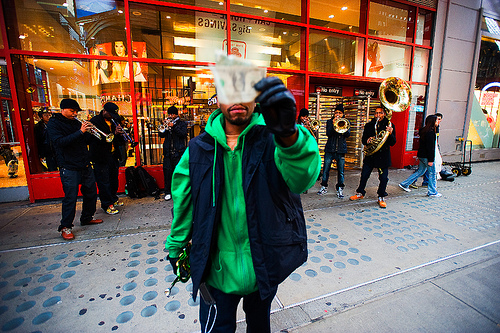

<start> An African-American man wearing a green sweatshirt and blue vest is holding up 2 dollar bills in front of his face , while standing on a busy sidewalk in front of a group of men playing instruments . <end>


In [ ]:
#image that has max_length caption!

imageofCaptionWithMaxLen = pd_dataset.image_id[3614]
print(imageofCaptionWithMaxLen)
z = Image(filename = images_path+"/" + imageofCaptionWithMaxLen)
display(z)
print(pd_dataset.captions[3614])


In [ ]:
from keras.preprocessing import sequence

padded_sequences, subsequent_words = [], []

for ix in range(ds.shape[0]):
    partial_seqs = []
    next_words = []
    text = ds[ix, 1].split()
    text = [word_2_indices[i] for i in text]
    for i in range(1, len(text)):
        partial_seqs.append(text[:i])
        next_words.append(text[i])
    padded_partial_seqs = sequence.pad_sequences(partial_seqs, max_len, padding='post')

    next_words_1hot = np.zeros([len(next_words), vocab_size], dtype=np.bool)
    
    #Vectorization
    for i,next_word in enumerate(next_words):
        next_words_1hot[i, next_word] = 1
        
    padded_sequences.append(padded_partial_seqs)
    subsequent_words.append(next_words_1hot)
    
padded_sequences = np.asarray(padded_sequences)
subsequent_words = np.asarray(subsequent_words)

print(padded_sequences.shape)
print(subsequent_words.shape)

NameError: ignored

In [ ]:
num_of_images = 5000

In [ ]:
captions = np.zeros([0, max_len])
next_words = np.zeros([0, vocab_size])

NameError: ignored

In [ ]:
for ix in range(num_of_images):#img_to_padded_seqs.shape[0]):
    captions = np.concatenate([captions, padded_sequences[ix]])
    next_words = np.concatenate([next_words, subsequent_words[ix]])
    if(ix%500 == 0):
      print(ix )

np.save("captions.npy", captions)
np.save("next_words.npy", next_words)

print(captions.shape)
print(next_words.shape)

0
500
1000
1500
2000
2500
3000
3500


In [ ]:
import pickle 

with open('/content/train_encoded_images.p', 'rb') as f:
    encoded_images = pickle.load(f, encoding="bytes")

In [ ]:
imgs = []

for ix in range(ds.shape[0]):
    if ds[ix, 0].encode() in encoded_images.keys():
#         print(ix, encoded_images[ds[ix, 0].encode()])
        imgs.append(list(encoded_images[ds[ix, 0].encode()]))

imgs = np.asarray(imgs)
print(imgs.shape)

NameError: ignored

In [ ]:
images = []

for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        images.append(imgs[ix])
        
images = np.asarray(images)

np.save("images.npy", images)

print(images.shape)

(25493, 2048)


In [ ]:
image_names = []

for ix in range(num_of_images):
    for iy in range(padded_sequences[ix].shape[0]):
        image_names.append(ds[ix, 0])
        
image_names = np.asarray(image_names)

np.save("image_names.npy", image_names)

print(len(image_names))

25493


In [ ]:
captions = np.load("captions.npy")
next_words = np.load("next_words.npy")

print(captions.shape)
print(next_words.shape)

(25493, 40)
(25493, 8253)


In [ ]:
images = np.load("images.npy")

print(images.shape)

(25493, 2048)


In [ ]:
imag = np.load("image_names.npy")
        
print(imag.shape)


(25493,)


In [ ]:
embedding_size = 128
max_len = 40

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               262272    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 40, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________


In [ ]:
language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 128)           1056384   
_________________________________________________________________
lstm (LSTM)                  (None, 40, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 40, 128)           32896     
Total params: 1,483,520
Trainable params: 1,483,520
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_input (InputLayer)    [(None, 40)]         0                                            
__________________________________________________________________________________________________
dense_1_input (InputLayer)      [(None, 2048)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 128)      1056384     embedding_input[0][0]            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          262272      dense_1_input[0][0]              
_______________________________________________________________________________________

In [ ]:
hist = model.fit([images, captions], next_words, batch_size=512, epochs=200)

Epoch 1/200
50/50 [==============================] - 11s 210ms/step - loss: 0.2565 - accuracy: 0.9004
Epoch 2/200
50/50 [==============================] - 11s 210ms/step - loss: 0.2590 - accuracy: 0.8998
Epoch 3/200
50/50 [==============================] - 10s 209ms/step - loss: 0.2632 - accuracy: 0.8986
Epoch 4/200
50/50 [==============================] - 10s 208ms/step - loss: 0.2615 - accuracy: 0.8987
Epoch 5/200
50/50 [==============================] - 10s 209ms/step - loss: 0.2579 - accuracy: 0.8991
Epoch 6/200
50/50 [==============================] - 10s 208ms/step - loss: 0.2531 - accuracy: 0.9010
Epoch 7/200
50/50 [==============================] - 10s 208ms/step - loss: 0.2541 - accuracy: 0.9015
Epoch 8/200
50/50 [==============================] - 10s 209ms/step - loss: 0.2528 - accuracy: 0.9021
Epoch 9/200
50/50 [==============================] - 10s 208ms/step - loss: 0.2523 - accuracy: 0.9006
Epoch 10/200
50/50 [==============================] - 10s 208ms/step - loss: 0.250

In [ ]:
model.save_weights("model_weights.h5")

In [ ]:
def preprocessing(img_path):
    im = image.load_img(img_path, target_size=(224,224,3))
    im = image.img_to_array(im)
    im = np.expand_dims(im, axis=0)
    return im


In [ ]:
def get_encoding(model, img):
    image = preprocessing(img)
    pred = model.predict(image).reshape(2048)
    return pred

In [ ]:
resnet = ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')

In [ ]:
img = "/content/rose.jpeg"

test_img = get_encoding(resnet, img)

In [ ]:
def predict_captions(image):
    start_word = ["<start>"]
    while True:
        par_caps = [word_2_indices[i] for i in start_word]
        par_caps = sequence.pad_sequences([par_caps], maxlen=max_len, padding='post')
        preds = model.predict([np.array([image]), np.array(par_caps)])
        word_pred = indices_2_word[np.argmax(preds[0])]
        start_word.append(word_pred)
        
        if word_pred == "<end>" or len(start_word) > max_len:
            break
            
    return ' '.join(start_word[1:-1])

Argmax_Search = predict_captions(test_img)

In [ ]:
dispImg = Image(filename=img)
display(dispImg)

print(Argmax_Search)

NameError: ignored